In [95]:
import tweepy
from tweepy.auth import OAuthHandler

#USING KEYS FROM DEV TWITTER.COM AFTER CRAETING AN ACCOUNT
consumerKey="nP0nYyGdaqdnklVrpPxFz1eqR"
consumerSecret="NYBLE534mp9u5qMHFyvoACt1Y4sClGHtwJDHSVnVvrLDF5mvc3"
accessToken="1236151860395835393-hle2xGL4DFaCsIuMEdCJQW9h3pLYky"
accessTokenSecret="BtQSKbutijQHMUhKybXSEpF6TZehhiWKr6ADXkaex2d59"

try:
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)
    api = tweepy.API(auth) 
except:
    print("Failed_1 Bad luck")
    
posts=api.user_timeline(screen_name='BillGates', count=100, lang ='en', tweet_mode='extended')
i=1
print("TEXT:\n")
print("__________________________________________________________________________________")
for tweet in posts:
    print(str(i)+')'+ tweet.full_text +'\n')
    i=i+1
    print("_______________________________________")
print("success")


TEXT:

__________________________________________________________________________________
1)Justice Ginsburg was a trailblazer who devoted her entire career to fighting for equal justice for women, because she knew it would improve life for everyone. America is a better place because of her service. I am inspired by her life and legacy. https://t.co/hFksGoIXXZ

_______________________________________
2)My dad was the “real” Bill Gates. He was everything I try to be and I will miss him every day.

https://t.co/OnAEsmosNb

_______________________________________
3)Thank you to the heroes everywhere working to keep us safe. I hope their stories inspire you just as much as they have me: https://t.co/DYFUYMEPK7 https://t.co/UKT9BfXHyk

_______________________________________
4)These heroes represent the best of who we can be. Their efforts to solve the world’s challenges demonstrate our values as a society and they serve as powerful examples of how to make a positive difference in the world

In [97]:
# Create the authentication object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret) 
    
# Set the access token and access token secret
authenticate.set_access_token(accessToken, accessTokenSecret) 
    
# Creating the API object while passing in auth information
api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [98]:
# Extract 100 tweets from the twitter user
posts = api.user_timeline(screen_name="BillGates", count = 100, lang ="en", tweet_mode="extended")

#  Print the last 5 tweets
print("Show the 5 recent tweets:\n")
i=1
for tweet in posts[:5]:
    print(str(i) +') '+ tweet.full_text + '\n')
    i= i+1

Show the 5 recent tweets:

1) Justice Ginsburg was a trailblazer who devoted her entire career to fighting for equal justice for women, because she knew it would improve life for everyone. America is a better place because of her service. I am inspired by her life and legacy. https://t.co/hFksGoIXXZ

2) My dad was the “real” Bill Gates. He was everything I try to be and I will miss him every day.

https://t.co/OnAEsmosNb

3) Thank you to the heroes everywhere working to keep us safe. I hope their stories inspire you just as much as they have me: https://t.co/DYFUYMEPK7 https://t.co/UKT9BfXHyk

4) These heroes represent the best of who we can be. Their efforts to solve the world’s challenges demonstrate our values as a society and they serve as powerful examples of how to make a positive difference in the world. https://t.co/u9n0WvN0EP

5) RT @OurWorldInData: Some countries responded successfully to the pandemic – and more broadly, some are much more successful in protecting t…



In [99]:
# Create a dataframe with a column called Tweets
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
# Show the first 5 rows of data
df.head()

,Tweets
0,Justice Ginsburg was a trailblazer who devoted...
1,My dad was the “real” Bill Gates. He was every...
2,Thank you to the heroes everywhere working to ...
3,These heroes represent the best of who we can ...
4,RT @OurWorldInData: Some countries responded s...


In [100]:
# Create a function to clean the tweets
def cleanTxt(text):
    text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
    text = re.sub('#', '', text) # Removing '#' hash tag
    text = re.sub('RT[\s]+', '', text) # Removing RT
    text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
    return text

In [101]:
# Clean the tweets
df['Tweets'] = df['Tweets'].apply(cleanTxt)
# Show the cleaned tweets
df

,Tweets
0,Justice Ginsburg was a trailblazer who devoted...
1,My dad was the “real” Bill Gates. He was every...
2,Thank you to the heroes everywhere working to ...
3,These heroes represent the best of who we can ...
4,: Some countries responded successfully to the...
...,...
95,Extreme physical distancing measures will make...
96,There’s no question the United States missed t...
97,I’m inspired by the generosity of everyone who...
98,One of the questions I am most often asked abo...


In [102]:
from nltk.classify import NaiveBayesClassifier
def words_feat(words):
    return dict([(words,True) for word in words])
positive_vocab=['awesome','outsanding','fantastic','terrific','nice','smile']
negative_vocab=['bad','terrible','hate','damage','evil','flop','boring']

positive =[(words_feat(pos),'pos')for pos in positive_vocab]
negative =[(words_feat(neg),'neg')for neg in positive_vocab] 

train_set = negative + positive
classifier = NaiveBayesClassifier.train(train_set)
neg=0
pos=0
for wordf in tweet.full_text:
    classResult=classifier.classify(words_feat(wordf))
    if classResult == 'neg':
        neg = neg+1
        
    if classResult == 'pos':
        pos=pos+1

print("positive:",pos)   
print("negative:",neg)  
print("positive:",float(pos)/len(tweet.full_text))  
print("negative:",float(neg)/len(tweet.full_text)) 

positive: 140
negative: 0
positive: 1.0
negative: 0.0


In [103]:
# Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
    return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)
df

,Tweets,Subjectivity,Polarity
0,Justice Ginsburg was a trailblazer who devoted...,0.458333,0.166667
1,My dad was the “real” Bill Gates. He was every...,0.300000,0.200000
2,Thank you to the heroes everywhere working to ...,0.350000,0.350000
3,These heroes represent the best of who we can ...,0.615152,0.509091
4,: Some countries responded successfully to the...,0.642500,0.512500
...,...,...,...
95,Extreme physical distancing measures will make...,0.338624,-0.046759
96,There’s no question the United States missed t...,0.666667,0.100000
97,I’m inspired by the generosity of everyone who...,0.950000,0.300000
98,One of the questions I am most often asked abo...,0.550000,0.600000


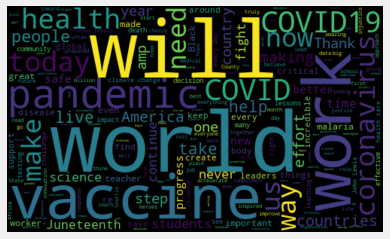

In [104]:
# word cloud visualization
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [105]:
 def getAnalysis(score):
        if score<0:
            return 'Negative'
        elif score ==0:
            return 'Neutral'
        else:
            return 'Positive'
    
df['Analysis'] = df['Polarity'].apply(getAnalysis)
df
 

,Tweets,Subjectivity,Polarity,Analysis
0,Justice Ginsburg was a trailblazer who devoted...,0.458333,0.166667,Positive
1,My dad was the “real” Bill Gates. He was every...,0.300000,0.200000,Positive
2,Thank you to the heroes everywhere working to ...,0.350000,0.350000,Positive
3,These heroes represent the best of who we can ...,0.615152,0.509091,Positive
4,: Some countries responded successfully to the...,0.642500,0.512500,Positive
...,...,...,...,...
95,Extreme physical distancing measures will make...,0.338624,-0.046759,Negative
96,There’s no question the United States missed t...,0.666667,0.100000,Positive
97,I’m inspired by the generosity of everyone who...,0.950000,0.300000,Positive
98,One of the questions I am most often asked abo...,0.550000,0.600000,Positive


In [112]:
# Printing positive tweets 
print('Printing Positive tweets:\n')
print('____________________________________________________________________________________________________')
j=1
sortedDF = df.sort_values(by=['Polarity']) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
    if( sortedDF['Analysis'][i] == 'Positive'):
        print(str(j) + ') '+ sortedDF['Tweets'][i])
    print()
    j= j+1


Printing Positive tweets:

____________________________________________________________________________________________________
1) Justice Ginsburg was a trailblazer who devoted her entire career to fighting for equal justice for women, because she knew it would improve life for everyone. America is a better place because of her service. I am inspired by her life and legacy. 

2) My dad was the “real” Bill Gates. He was everything I try to be and I will miss him every day.



3) Thank you to the heroes everywhere working to keep us safe. I hope their stories inspire you just as much as they have me:  

4) These heroes represent the best of who we can be. Their efforts to solve the world’s challenges demonstrate our values as a society and they serve as powerful examples of how to make a positive difference in the world. 

5) : Some countries responded successfully to the pandemic – and more broadly, some are much more successful in protecting t…

6) Clinical trials are critical to help

In [111]:
# Printing negative tweets  
print('Printing negative tweets:\n')
print("____________________________________________________________________________________________")
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=False) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
     if( sortedDF['Analysis'][i] == 'Negative'):
            print(str(j) + ') '+sortedDF['Tweets'][i])
            print()
            j=j+1

Printing negative tweets:

____________________________________________________________________________________________
1) Because of long-standing barriers that are made worse by COVID-19, hundreds of thousands of students with promise may never start college. This would be disastrous for these young people and for the country. Here’s what we’re doing to help: 

2) : Three lessons that have been central to the COVID19 response in South Africa, Liberia, &amp; other countries:
🔸 Screening…

3) Globally, a lack of medical oxygen–needed to treat pneumonia, malaria, and other diseases–leads to hundreds of thousands of deaths each year.  founded _Tele to address this often-overlooked challenge. 

4) : “It’s that clarity of language about the VALUE of black life in America that distinguishes Juneteenth as emancipation…

5) : “Only those feigning blindness fail to see the body of work we are, and the work of body we have done. 

Everything is what it is…

6) : Juneteenth recognizes &amp; cele

In [110]:
# Printing negative tweets  
print('Printing neutral tweets:\n')
print("____________________________________________________________________________________________")
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=False) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
     if( sortedDF['Analysis'][i] == 'Neutral'):
            print(str(j) + ') '+sortedDF['Tweets'][i])
            print()
            j=j+1

Printing neutral tweets:

____________________________________________________________________________________________
1) : Vaccines prevent millions of deaths every year by harnessing the body’s immune system to create defences against future infection…

2) : As a community health worker in Kenya’s Homa Bay County, Evaline has helped her community dramatically reduce the number of…

3) Move aside, . This is the still the world’s deadliest killer:  

4) : This commitment is critical. “Additional manufacturing capacity to begin producing doses for every country, not just the…

5) : Last month, over 1 billion students were affected by COVID19 school closures.

Even before the pandemic, the world wa…

6) Bill Foege was instrumental in the effort to eradicate smallpox (and is a personal hero of mine). Here he outlines how lessons learned from that campaign can apply to the fight against COVID-19. 

7) : In our recent webinar,  called for community-led responses to coronavirus. These types 

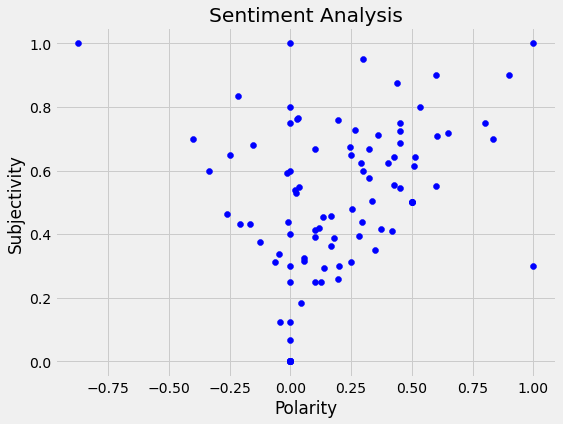

In [94]:
# Plotting 
plt.figure(figsize=(8,6)) 
for i in range(0, df.shape[0]):
  plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Blue') 
# plt.scatter(x,y,color)   
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

In [45]:
# Print the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']
ptweets

round( (ptweets.shape[0] / df.shape[0]) * 100 , 1)

0.0

In [46]:
# Print the percentage of negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']
ntweets

round( (ntweets.shape[0] / df.shape[0]) * 100, 1)

0.0

In [47]:
# Show the value counts
df['Analysis'].value_counts()

positive    64
neutral     21
negative    15
Name: Analysis, dtype: int64

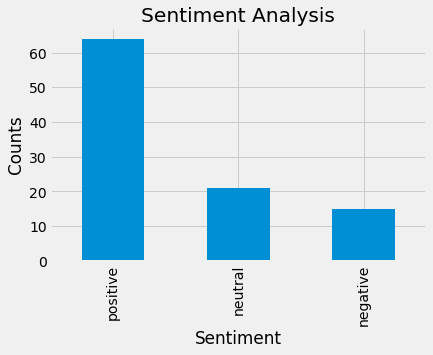

In [48]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()

In [73]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis